양적 생산성	“얼마나 많이/빠르게 수행했는가”를 수치화한 결과	시간, 양, 완료율 등
질적 생산성	“얼마나 잘/깊이 수행했는가”를 평가한 결과	정확성, 집중도, 난이도, 성공 여부 등

In [1]:
# 데이터 불러오기 

import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('ai_dev_productivity.csv')

In [2]:
# 2. 결측치 제거
df.dropna(inplace=True)

# 3. 데이터 확인
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
       hours_coding  coffee_intake_mg  distractions  sleep_hours    commits  \
count    500.000000        500.000000    500.000000   500.000000  500.00000   
mean       5.015600        463.192000      2.976000     6.975800    4.60800   
std        1.947253        142.334991      1.678409     1.455965    2.70499   
min    

In [3]:
# 1. 양적 생산성 지표: QPI
df['QPI'] = df['commits'] - df['bugs_reported']

# 2. 질적 생산성 지표: LPI
df['LPI'] = 0.5 * df['task_success'] + 0.5 * (1 - df['cognitive_load'] / 10)

# 3. 확인
print(df[['ai_usage_hours', 'QPI', 'LPI']].head())


   ai_usage_hours  QPI    LPI
0            0.71    1  0.730
1            1.75    2  0.765
2            2.27    2  0.890
3            1.40    4  0.205
4            1.26    4  0.685


QPI 회귀계수: 0.806, 절편: 2.533, R²: 0.091


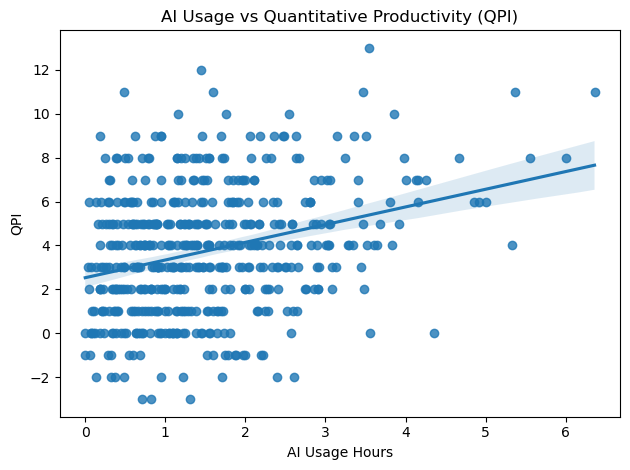

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 단순 회귀: AI 사용 → QPI
X = df[['ai_usage_hours']]
y_qpi = df['QPI']
model_qpi = LinearRegression().fit(X, y_qpi)

print(f"QPI 회귀계수: {model_qpi.coef_[0]:.3f}, 절편: {model_qpi.intercept_:.3f}, R²: {model_qpi.score(X, y_qpi):.3f}")

# 시각화
sns.regplot(x='ai_usage_hours', y='QPI', data=df)
plt.title('AI Usage vs Quantitative Productivity (QPI)')
plt.xlabel('AI Usage Hours')
plt.ylabel('QPI')
plt.tight_layout()
plt.show()


In [5]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = df['ai_usage_hours']
y = df['QPI']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 요약
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    QPI   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     50.06
Date:                Mon, 26 May 2025   Prob (F-statistic):           5.09e-12
Time:                        13:26:09   Log-Likelihood:                -1216.4
No. Observations:                 500   AIC:                             2437.
Df Residuals:                     498   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5326      0.212     11.

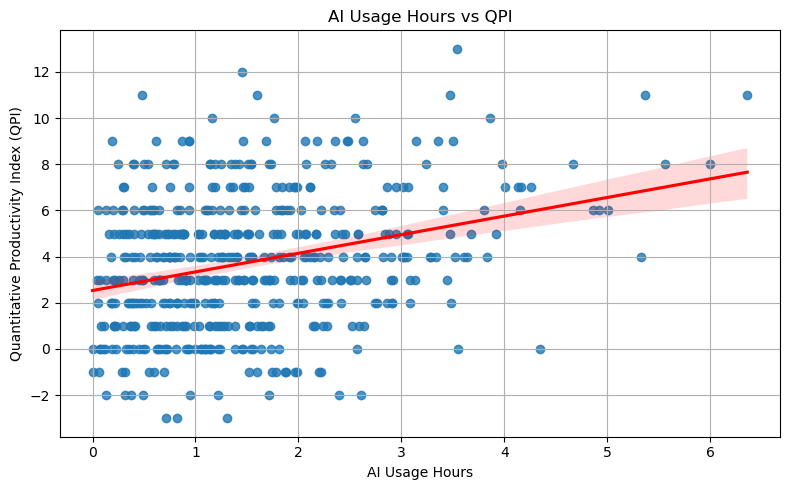

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 + 회귀선
plt.figure(figsize=(8, 5))
sns.regplot(x='ai_usage_hours', y='QPI', data=df, line_kws={'color': 'red'})
plt.title('AI Usage Hours vs QPI')
plt.xlabel('AI Usage Hours')
plt.ylabel('Quantitative Productivity Index (QPI)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# 다중 회귀: 환경 요인 추가
X_multi = df[['ai_usage_hours', 'sleep_hours', 'distractions', 'coffee_intake_mg']]
y_multi = df['QPI']

X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y_multi, X_multi).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                    QPI   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     47.65
Date:                Mon, 26 May 2025   Prob (F-statistic):           6.76e-34
Time:                        13:27:40   Log-Likelihood:                -1158.9
No. Observations:                 500   AIC:                             2328.
Df Residuals:                     495   BIC:                             2349.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5882      0.688  

In [8]:
X_LPI = sm.add_constant(df['ai_usage_hours'])
y_LPI = df['LPI']

model_LPI = sm.OLS(y_LPI, X_LPI).fit()
print(model_LPI.summary())


                            OLS Regression Results                            
Dep. Variable:                    LPI   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     15.16
Date:                Mon, 26 May 2025   Prob (F-statistic):           0.000112
Time:                        13:28:02   Log-Likelihood:                -62.671
No. Observations:                 500   AIC:                             129.3
Df Residuals:                     498   BIC:                             137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5114      0.021     24.

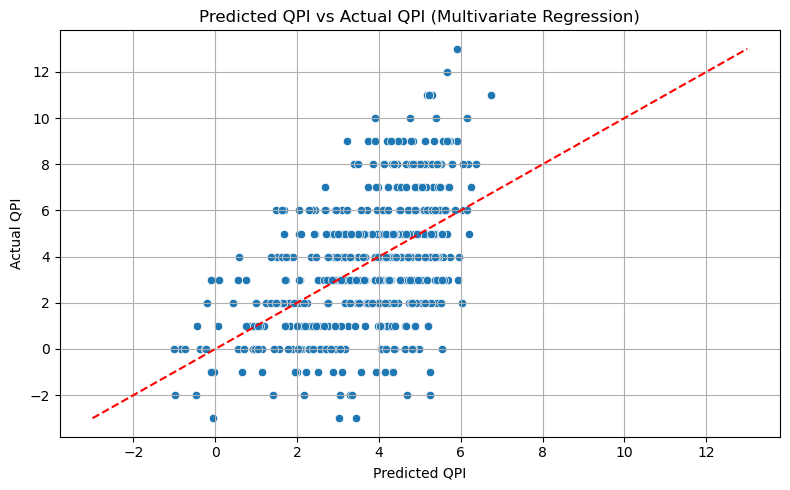

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 다중 회귀 독립변수 및 종속변수
X_multi = df[['ai_usage_hours', 'sleep_hours', 'distractions', 'coffee_intake_mg']]
y = df['QPI']
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()

# 예측값 및 잔차 계산
df['QPI_pred_multi'] = model_multi.fittedvalues
df['QPI_resid_multi'] = model_multi.resid

# 예측값 vs 실제값
plt.figure(figsize=(8,5))
sns.scatterplot(x='QPI_pred_multi', y='QPI', data=df)
plt.plot([df['QPI'].min(), df['QPI'].max()], [df['QPI'].min(), df['QPI'].max()], color='red', linestyle='--')
plt.title('Predicted QPI vs Actual QPI (Multivariate Regression)')
plt.xlabel('Predicted QPI')
plt.ylabel('Actual QPI')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

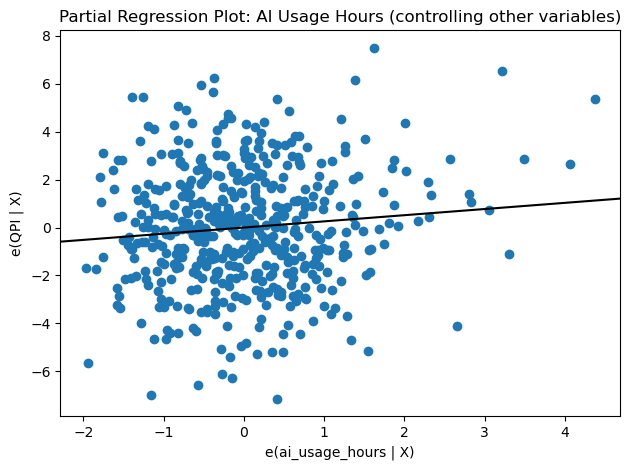

In [10]:
from statsmodels.graphics.regressionplots import plot_partregress

fig = plt.figure(figsize=(8, 6))
plot_partregress('QPI', 'ai_usage_hours', ['sleep_hours', 'distractions', 'coffee_intake_mg'], data=df, obs_labels=False)
plt.title('Partial Regression Plot: AI Usage Hours (controlling other variables)')
plt.tight_layout()
plt.show()


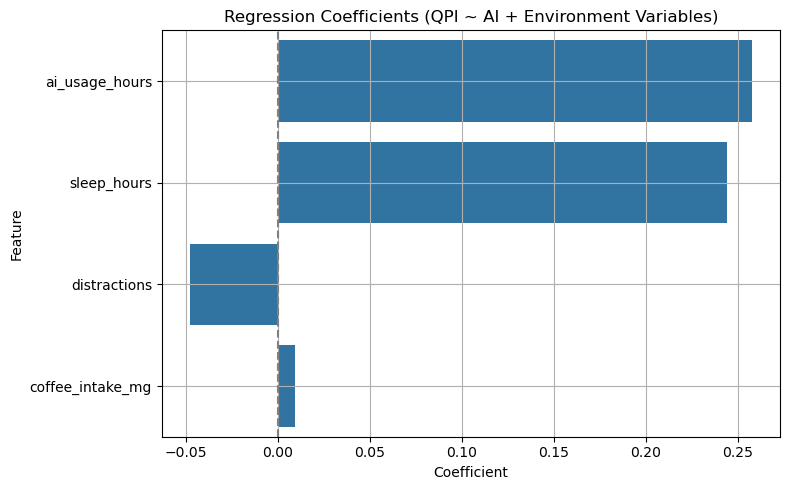

In [11]:
coefs = model_multi.params.drop('const')
plt.figure(figsize=(8,5))
sns.barplot(x=coefs.values, y=coefs.index)
plt.title('Regression Coefficients (QPI ~ AI + Environment Variables)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


AI 사용 시간(ai_usage_hours)이 생산성에 유의미한 영향을 미치는가?

분석 변수:
독립 변수 (X): ai_usage_hours

종속 변수 (Y):

QPI: 양적 생산성

LPI: 질적 생산성

단순 회귀 결과 (QPI):
                            OLS Regression Results                            
Dep. Variable:                    QPI   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     50.06
Date:                Mon, 26 May 2025   Prob (F-statistic):           5.09e-12
Time:                        13:32:07   Log-Likelihood:                -1216.4
No. Observations:                 500   AIC:                             2437.
Df Residuals:                     498   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5326   

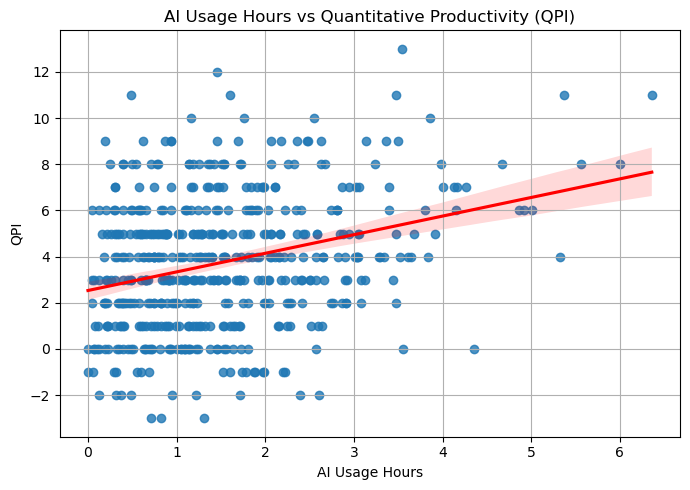

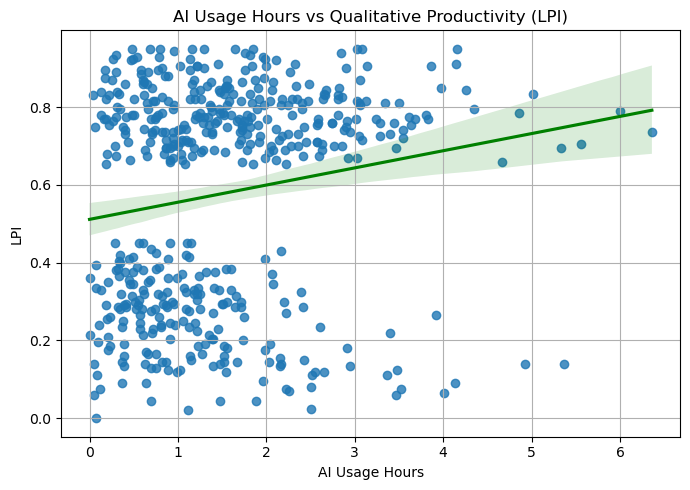

In [12]:
# 0. 필요한 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. 데이터 불러오기
df = pd.read_csv('ai_dev_productivity.csv')

# 2. QPI, LPI 파생 변수 생성
df['QPI'] = df['commits'] - df['bugs_reported']
df['LPI'] = 0.5 * df['task_success'] + 0.5 * (1 - df['cognitive_load'] / 10)

# 3. 단순 회귀 분석 – QPI
X_qpi = sm.add_constant(df['ai_usage_hours'])
y_qpi = df['QPI']
model_qpi = sm.OLS(y_qpi, X_qpi).fit()
print("단순 회귀 결과 (QPI):")
print(model_qpi.summary())

# 4. 단순 회귀 분석 – LPI
X_lpi = sm.add_constant(df['ai_usage_hours'])
y_lpi = df['LPI']
model_lpi = sm.OLS(y_lpi, X_lpi).fit()
print("\n단순 회귀 결과 (LPI):")
print(model_lpi.summary())

# 5. 시각화 – QPI
plt.figure(figsize=(7, 5))
sns.regplot(x='ai_usage_hours', y='QPI', data=df, line_kws={'color': 'red'})
plt.title('AI Usage Hours vs Quantitative Productivity (QPI)')
plt.xlabel('AI Usage Hours')
plt.ylabel('QPI')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. 시각화 – LPI
plt.figure(figsize=(7, 5))
sns.regplot(x='ai_usage_hours', y='LPI', data=df, line_kws={'color': 'green'})
plt.title('AI Usage Hours vs Qualitative Productivity (LPI)')
plt.xlabel('AI Usage Hours')
plt.ylabel('LPI')
plt.grid(True)
plt.tight_layout()
plt.show()


AI 없이도 생산성에 영향을 줄 수 있는 변수들을 분석

각각의 변수들이 QPI 또는 LPI에 주는 영향력 비교

In [13]:
# 회귀 분석을 위한 함수 정의
def run_simple_regression(df, x_var, y_var='QPI'):
    import statsmodels.api as sm
    X = sm.add_constant(df[x_var])
    y = df[y_var]
    model = sm.OLS(y, X).fit()
    print(f"\n--- {x_var} → {y_var} 회귀 결과 ---")
    print(model.summary())

# 각 환경 변수에 대해 QPI를 종속 변수로 분석
run_simple_regression(df, 'sleep_hours')
run_simple_regression(df, 'distractions')
run_simple_regression(df, 'coffee_intake_mg')

# 필요시 LPI로 바꿔서도 실행
run_simple_regression(df, 'sleep_hours', y_var='LPI')



--- sleep_hours → QPI 회귀 결과 ---
                            OLS Regression Results                            
Dep. Variable:                    QPI   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.587
Date:                Mon, 26 May 2025   Prob (F-statistic):             0.0327
Time:                        13:34:35   Log-Likelihood:                -1238.0
No. Observations:                 500   AIC:                             2480.
Df Residuals:                     498   BIC:                             2488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2

C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\696430875.py:25: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\696430875.py:25: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\696430875.py:25: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\696430875.py:25: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\696430875.py:25: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\chlwo\AppData\Local\Temp\ipyk

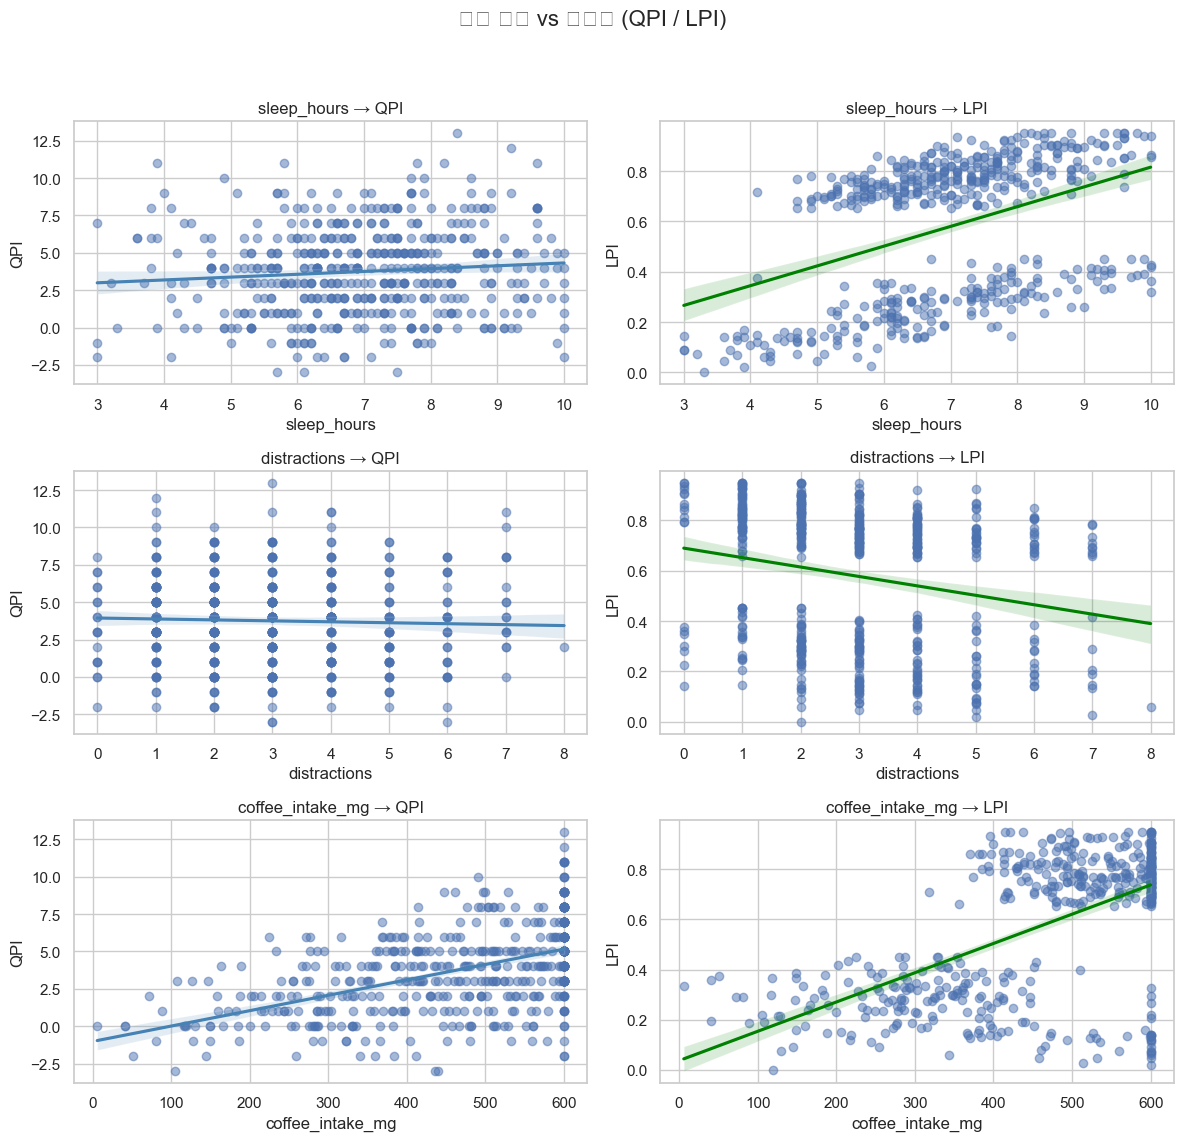

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일
sns.set(style="whitegrid")

# 설정: 변수 목록
env_vars = ['sleep_hours', 'distractions', 'coffee_intake_mg']
target_vars = ['QPI', 'LPI']
colors = ['steelblue', 'green']

# 서브플롯 설정
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle("환경 변수 vs 생산성 (QPI / LPI)", fontsize=16)

for i, env_var in enumerate(env_vars):
    for j, target in enumerate(target_vars):
        ax = axes[i, j]
        sns.regplot(x=env_var, y=target, data=df, ax=ax,
                    line_kws={'color': colors[j]}, scatter_kws={'alpha': 0.5})
        ax.set_title(f"{env_var} → {target}")
        ax.set_xlabel(env_var)
        ax.set_ylabel(target)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1196939486.py:19: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1196939486.py:19: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1196939486.py:19: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1196939486.py:19: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1196939486.py:19: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1196939486.py:19: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.ti

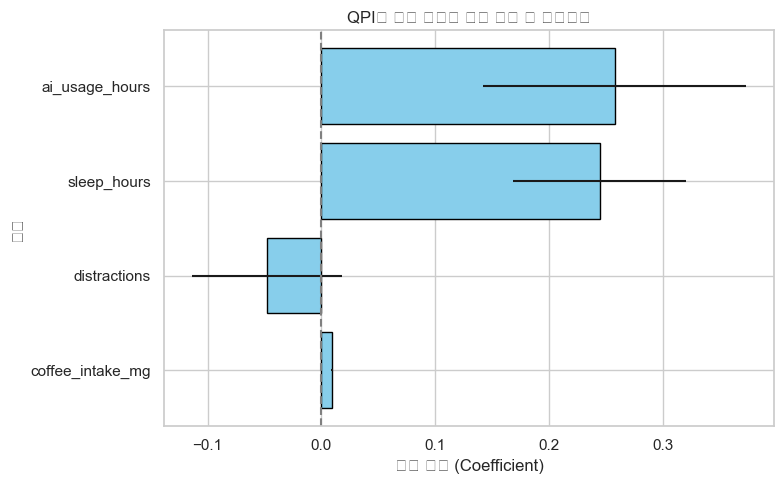

In [17]:
import matplotlib.pyplot as plt

# 1. 변수 및 계수 준비
coefs = model.params.drop('const')
errors = model.bse.drop('const')

# 2. 변수 순서를 뒤집어서 위에서 아래로 출력
variables = coefs.index[::-1]
coef_values = coefs.values[::-1]
error_values = errors.values[::-1]

# 3. 수평 막대그래프 시각화
plt.figure(figsize=(8, 5))
plt.barh(variables, coef_values, xerr=error_values, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('QPI에 대한 변수별 회귀 계수 및 표준오차')
plt.xlabel('회귀 계수 (Coefficient)')
plt.ylabel('변수')
plt.tight_layout()
plt.show()




C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\484824481.py:36: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\484824481.py:36: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\484824481.py:36: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\484824481.py:36: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\484824481.py:36: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\484824481.py:36: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_la

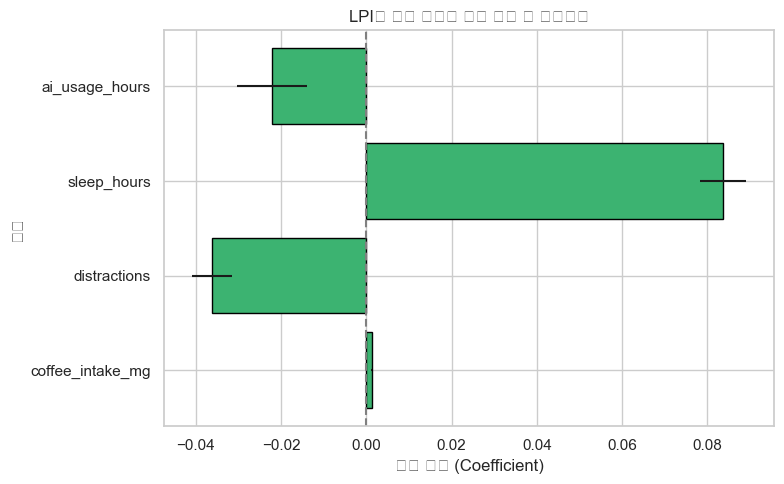

In [18]:
# 필요한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. 데이터 불러오기 (이미 있다면 생략 가능)
df = pd.read_csv('ai_dev_productivity.csv')

# 2. 파생 변수 생성
df['QPI'] = df['commits'] - df['bugs_reported']
df['LPI'] = 0.5 * df['task_success'] + 0.5 * (1 - df['cognitive_load'] / 10)

# 3. 다중 회귀 분석 (LPI 기준)
X_lpi = df[['ai_usage_hours', 'sleep_hours', 'distractions', 'coffee_intake_mg']]
y_lpi = df['LPI']
X_lpi = sm.add_constant(X_lpi)
model_lpi = sm.OLS(y_lpi, X_lpi).fit()

# 4. 회귀 계수 및 오차 추출
coefs = model_lpi.params.drop('const')
errors = model_lpi.bse.drop('const')

# 5. 역순 정렬
variables = coefs.index[::-1]
coef_values = coefs.values[::-1]
error_values = errors.values[::-1]

# 6. 시각화
plt.figure(figsize=(8, 5))
plt.barh(variables, coef_values, xerr=error_values,
         color='mediumseagreen', edgecolor='black')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('LPI에 대한 변수별 회귀 계수 및 표준오차')
plt.xlabel('회귀 계수 (Coefficient)')
plt.ylabel('변수')
plt.tight_layout()
plt.show()


AI 사용량과 환경 요인이 과제 성공(task_success)에 어떤 영향을 미치는가?

종속 변수: task_success (0=실패, 1=성공)

독립 변수: ai_usage_hours, sleep_hours, distractions, coffee_intake_mg

분석 방법: 로지스틱 회귀 (statsmodels.Logit)

Optimization terminated successfully.
         Current function value: 0.294390
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           task_success   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Mon, 26 May 2025   Pseudo R-squ.:                  0.5609
Time:                        13:43:44   Log-Likelihood:                -147.20
converged:                       True   LL-Null:                       -335.25
Covariance Type:            nonrobust   LLR p-value:                 4.023e-80
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -15.1018      1.564     -9.655      0.000     -18.167     -12.036
ai_usage_ho

C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1620793930.py:47: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1620793930.py:47: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1620793930.py:47: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1620793930.py:47: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1620793930.py:47: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_227532\1620793930.py:47: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) Arial.
  plt.tigh

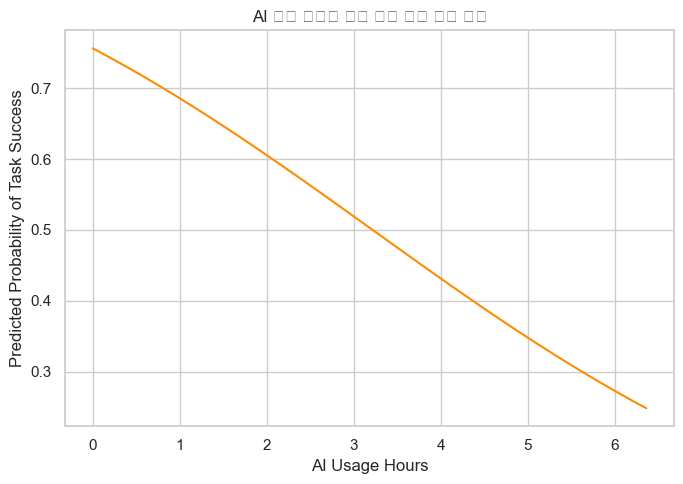

In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 (이미 있다면 생략)
df = pd.read_csv('ai_dev_productivity.csv')

# 2. 독립변수 및 종속변수 설정
X = df[['ai_usage_hours', 'sleep_hours', 'distractions', 'coffee_intake_mg']]
y = df['task_success']
X = sm.add_constant(X)

# 3. 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y, X).fit()

# 4. 회귀 결과 출력
print(logit_model.summary())

# 5. 예측 확률 시각화 (AI 사용량 중심으로)
import numpy as np
from scipy.special import expit  # sigmoid 함수

# AI 사용량만 바꾸고 나머지는 평균값으로 고정
ai_range = np.linspace(df['ai_usage_hours'].min(), df['ai_usage_hours'].max(), 100)
mean_sleep = df['sleep_hours'].mean()
mean_dist = df['distractions'].mean()
mean_coffee = df['coffee_intake_mg'].mean()

X_plot = pd.DataFrame({
    'const': 1.0,
    'ai_usage_hours': ai_range,
    'sleep_hours': mean_sleep,
    'distractions': mean_dist,
    'coffee_intake_mg': mean_coffee
})

# 예측 확률 계산
pred_prob = logit_model.predict(X_plot)

# 시각화
plt.figure(figsize=(7,5))
plt.plot(ai_range, pred_prob, color='darkorange')
plt.xlabel('AI Usage Hours')
plt.ylabel('Predicted Probability of Task Success')
plt.title('AI 사용 시간에 따른 과제 성공 확률 예측')
plt.grid(True)
plt.tight_layout()
plt.show()


X축	AI 사용 시간 (시간 단위)
Y축	task_success = 1 (과제 성공 확률)
관찰된 패턴	AI 사용 시간이 증가할수록 성공 확률이 점차 감소

해석 요약
단순히 AI를 많이 사용한다고 해서 무조건 성공하는 건 아니라는 점이 실증적으로 드러남

과도한 의존 또는 숙련도 부족한 사용일 가능성

다른 변수들(수면, 집중 등)을 보정한 결과이기 때문에 AI 단독 효과만 추출된 것임

발표용 멘트 예시
로지스틱 회귀 분석 결과, AI 사용 시간이 증가할수록 오히려 과제 성공 확률이 감소하는 경향이 관찰되었습니다.
이는 AI 도구의 비효율적인 사용, 또는 복잡한 과제일수록 AI 사용 시간이 늘어났기 때문일 수 있습니다.
즉, 단순한 "많이 쓰면 좋다"는 접근보다, 적절하고 전략적인 활용이 성과에 더 중요함을 시사합니다.